In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50 as pretrainedModel , preprocess_input

In [2]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [3]:
# train_path = '/content/drive/MyDrive/data_set/data/train'
# valid_path = '/content/drive/MyDrive/data_set/data/test'

In [4]:
train_path = 'data/train'
valid_path = 'data/test'

In [5]:
from glob import glob
imageFiles = glob( train_path + '/*/*.jpeg')
validFiles = glob( valid_path + '/*/*.jpeg')
imageFiles

['data/train\\ill\\1.jpeg',
 'data/train\\ill\\2.jpeg',
 'data/train\\ill\\3.jpeg',
 'data/train\\ill\\4.jpeg',
 'data/train\\ill\\5.jpeg',
 'data/train\\ill\\6.jpeg',
 'data/train\\normal\\1.jpeg',
 'data/train\\normal\\2.jpeg',
 'data/train\\normal\\3.jpeg',
 'data/train\\normal\\4.jpeg',
 'data/train\\normal\\5.jpeg',
 'data/train\\normal\\6.jpeg']

In [6]:
import numpy as np
import matplotlib.pyplot as plt

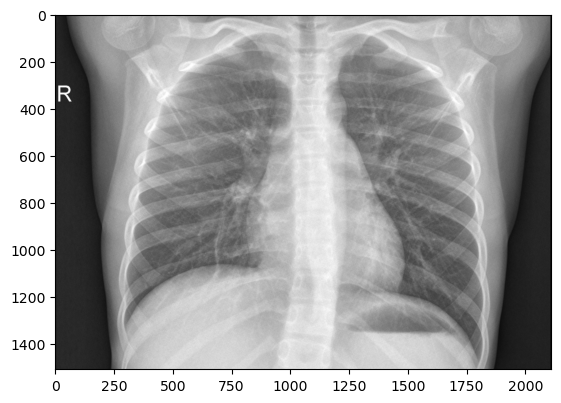

In [7]:
plt.imshow(image.load_img(np.random.choice(imageFiles)))

In [26]:
image_size= [50, 50]  # minimum: 32*32

In [28]:
## this cell use in colab environment

# ptm = pretrainedModel(
#     input_shape = image_size + [3],  # create 3D image , pic(A,B,C)
#     weights= 'imagenet',
#     include_top = False
# )

In [30]:
from tensorflow.keras.applications import ResNet50

ptm = ResNet50(
    input_shape=image_size + [3],  # (50, 50, 3)
    weights='resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',         
    include_top=False              
)

In [32]:
ptm.trainable = False

In [34]:
folders = glob(train_path + '/*')
folders

['data/train\\ill', 'data/train\\normal']

In [36]:
k = len(folders)

In [38]:
# no need for Conv2D and Pooling in ResNet
x = Flatten()(ptm.output)
x = Dense(k, activation = 'softmax')(x)
model = Model (inputs = ptm.input, outputs = x)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function= preprocess_input
)

In [42]:
batchsize = 128

In [44]:
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize,
    class_mode='categorical'
)

Found 12 images belonging to 2 classes.


In [46]:
valid_generator = gen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize,
    class_mode='categorical'
)

Found 12 images belonging to 2 classes.


In [48]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
r = model.fit(train_generator, validation_data= valid_generator, epochs = 5)

C:\Users\javad\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.3333 - loss: 2.3426 - val_accuracy: 0.5000 - val_loss: 2.3661
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 1.8186 - val_accuracy: 0.5000 - val_loss: 2.6177
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9167 - loss: 0.4310 - val_accuracy: 0.4167 - val_loss: 5.4115
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.7817 - val_accuracy: 0.5000 - val_loss: 6.7602
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 1.0066 - val_accuracy: 0.5000 - val_loss: 6.7008


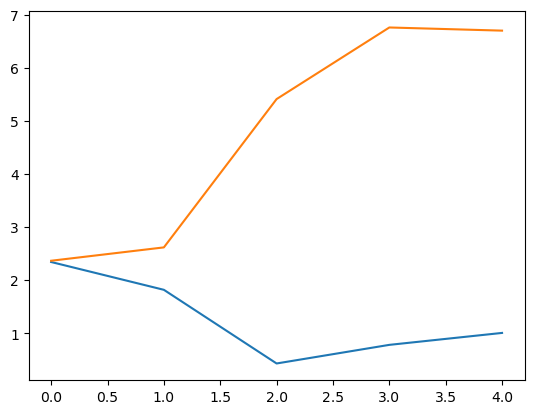

In [51]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

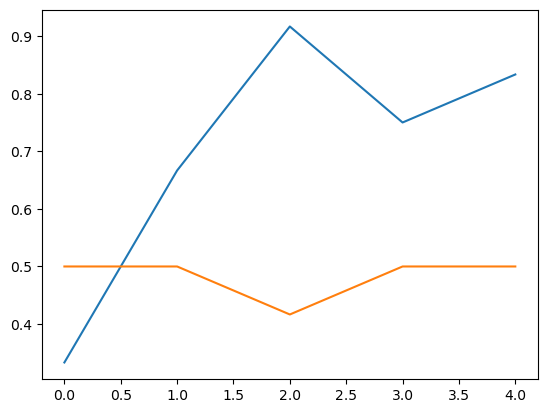

In [52]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')